In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

import cv2

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [57]:
#%%
PATH = os.getcwd()
# Define data path
data_path = PATH + '/SPC_data'
data_dir_list = os.listdir(data_path)
print (data_dir_list)
img_rows=128
img_cols=128
num_channel=3
num_epoch=100

['HTC-1-M7', 'iPhone-4s', 'iPhone-6']


In [3]:
# Define the number of classes
num_classes = 4

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		# input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(64,64))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-HTC-1-M7

Loaded the images of dataset-iPhone-4s

Loaded the images of dataset-iPhone-6

(825, 64, 64, 3)


In [4]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		

(825, 3, 64, 64)


In [ ]:
# #%%
# USE_SKLEARN_PREPROCESSING=False

# if USE_SKLEARN_PREPROCESSING:
# 	# using sklearn for preprocessing
# 	from sklearn import preprocessing
	
# 	def image_to_feature_vector(image, size=(128, 128)):
# 		# resize the image to a fixed size, then flatten the image into
# 		# a list of raw pixel intensities
# 		return cv2.resize(image, size).flatten()
	
# 	img_data_list=[]
# 	for dataset in data_dir_list:
# 		img_list=os.listdir(data_path+'/'+ dataset)
# 		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
# 		for img in img_list:
# 			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
# 			input_img_flatten=image_to_feature_vector(input_img,(128,128))
# 			img_data_list.append(input_img_flatten)
	
# 	img_data = np.array(img_data_list)
# 	img_data = img_data.astype('float32')
# 	print (img_data.shape)
# 	img_data_scaled = preprocessing.scale(img_data)
# 	print (img_data_scaled.shape)
	
# 	print (np.mean(img_data_scaled))
# 	print (np.std(img_data_scaled))
	
# 	print (img_data_scaled.mean(axis=0))
# 	print (img_data_scaled.std(axis=0))
	
# 	if K.image_dim_ordering()=='th':
# 		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
# 		print (img_data_scaled.shape)
		
# 	else:
# 		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
# 		print (img_data_scaled.shape)
	
	
# 	if K.image_dim_ordering()=='th':
# 		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
# 		print (img_data_scaled.shape)
		
# 	else:
# 		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
# 		print (img_data_scaled.shape)

# if USE_SKLEARN_PREPROCESSING:
# 	img_data=img_data_scaled

In [58]:
#Assigning Labels

# Define the number of classes
num_classes = 3

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:275]=0
labels[275:550]=1
labels[550:]=2
	  
names = ['HTC','I4','I6']
	  
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [59]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_train.shape)


(660, 3, 64, 64)


In [60]:
print(X_train[1])


[[[ 0.34901962  0.27843139  0.34117648 ...,  0.79215688  0.69411767
    0.76078433]
  [ 0.67058825  0.72156864  0.64705884 ...,  0.74901962  0.69803923
    0.7647059 ]
  [ 0.7764706   0.85490197  0.82352942 ...,  0.83529413  0.77254903
    0.86274511]
  ..., 
  [ 0.68235296  0.65882355  0.6156863  ...,  0.69803923  0.69803923
    0.74901962]
  [ 0.64313728  0.63529414  0.64705884 ...,  0.68627453  0.74509805
    0.74509805]
  [ 0.6901961   0.65882355  0.66274512 ...,  0.6156863   0.68627453
    0.78039217]]

 [[ 0.33725491  0.25882354  0.32941177 ...,  0.77254903  0.66666669
    0.73333335]
  [ 0.63529414  0.67843139  0.62352943 ...,  0.72156864  0.66274512
    0.73725492]
  [ 0.73333335  0.81568629  0.7764706  ...,  0.80784315  0.74509805
    0.8509804 ]
  ..., 
  [ 0.71764708  0.67843139  0.63137257 ...,  0.71764708  0.71372551
    0.76862746]
  [ 0.67450982  0.66274512  0.66666669 ...,  0.7019608   0.75294119
    0.74509805]
  [ 0.71764708  0.68627453  0.67843139 ...,  0.627451    0

IndexError: index 275 is out of bounds for axis 0 with size 165

In [61]:
#%%
# Defining the model
input_shape=img_data[0].shape
print(input_shape)

(3, 64, 64)


In [62]:
#convolution model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=input_shape,strides = 1))
model.add(MaxPooling2D(pool_size =(2,2),strides=2))
model.add(Conv2D(48,(5,5),strides=1))
model.add(MaxPooling2D(pool_size =(2,2),strides=2))
model.add(Conv2D(64,(5,5),strides=1))
model.add(MaxPooling2D(pool_size =(2,2),strides=2))
model.add(Conv2D(128,(5,5),strides=1))

model.add(Flatten())  
model.add(Dense(128,activation= 'relu'))

model.add(Dense(3,activation='softmax'))

# #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])



ValueError: Negative dimension size caused by subtracting 5 from 4 for 'conv2d_39/convolution' (op: 'Conv2D') with input shapes: [?,4,4,64], [5,5,64,128].

In [63]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])



In [64]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 64, 64)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 62, 62)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 32, 62, 62)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 31, 31)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 31, 31)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 48, 29, 29)        13872     
__________

True

In [65]:
#%%
# Training
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)



Train on 660 samples, validate on 165 samples
Epoch 1/100
660/660 [==============================] - 42s - loss: 1.1209 - acc: 0.3227 - val_loss: 1.1016 - val_acc: 0.2909
Epoch 2/100
660/660 [==============================] - 41s - loss: 1.1051 - acc: 0.3591 - val_loss: 1.1027 - val_acc: 0.2909
Epoch 3/100
660/660 [==============================] - 40s - loss: 1.0945 - acc: 0.3742 - val_loss: 1.0990 - val_acc: 0.3394
Epoch 4/100
660/660 [==============================] - 41s - loss: 1.1000 - acc: 0.3955 - val_loss: 1.0998 - val_acc: 0.2909
Epoch 5/100
660/660 [==============================] - 41s - loss: 1.0900 - acc: 0.3803 - val_loss: 1.0975 - val_acc: 0.3091
Epoch 6/100
660/660 [==============================] - 41s - loss: 1.0749 - acc: 0.4242 - val_loss: 1.1011 - val_acc: 0.3030
Epoch 7/100
660/660 [==============================] - 41s - loss: 1.0705 - acc: 0.4364 - val_loss: 1.0873 - val_acc: 0.3879
Epoch 8/100
660/660 [==============================] - 41s - loss: 1.0698 - acc

660/660 [==============================] - 42s - loss: 0.5678 - acc: 0.7939 - val_loss: 1.3064 - val_acc: 0.4061
Epoch 66/100
660/660 [==============================] - 41s - loss: 0.5626 - acc: 0.7879 - val_loss: 0.9674 - val_acc: 0.5818
Epoch 67/100
660/660 [==============================] - 42s - loss: 0.5603 - acc: 0.7864 - val_loss: 0.8633 - val_acc: 0.6667
Epoch 68/100
660/660 [==============================] - 42s - loss: 0.5734 - acc: 0.7894 - val_loss: 1.1611 - val_acc: 0.4667
Epoch 69/100
660/660 [==============================] - 41s - loss: 0.5114 - acc: 0.7909 - val_loss: 0.8222 - val_acc: 0.7030
Epoch 70/100
660/660 [==============================] - 42s - loss: 0.5107 - acc: 0.7970 - val_loss: 0.8873 - val_acc: 0.6000
Epoch 71/100
660/660 [==============================] - 41s - loss: 0.5404 - acc: 0.8091 - val_loss: 0.9280 - val_acc: 0.6061
Epoch 72/100
660/660 [==============================] - 41s - loss: 0.5675 - acc: 0.7833 - val_loss: 0.9962 - val_acc: 0.5879
Epoch

In [ ]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)



In [66]:

# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

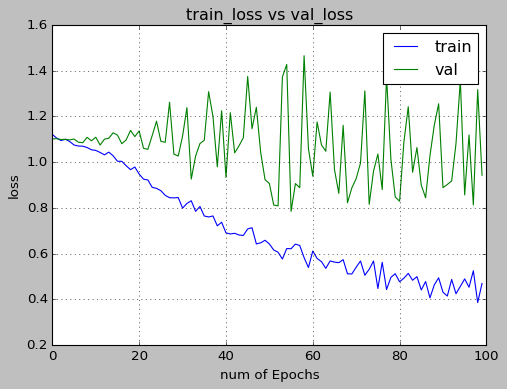

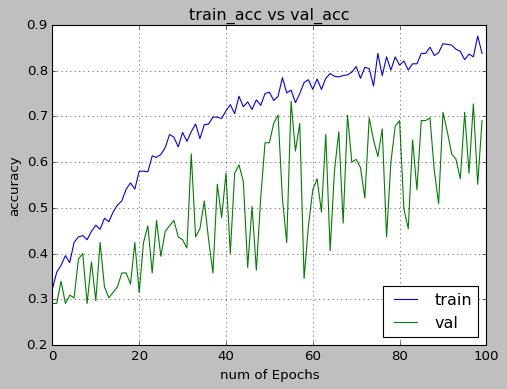

In [67]:
plt.show()

In [73]:
#%%

# Evaluating the model
i = 1
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[i:i+1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[i:i+1])


('Test Loss:', 0.94263902649734954)
('Test accuracy:', 0.69090909108971099)
(1, 3, 64, 64)
[[  4.49994914e-05   9.99845743e-01   1.09191569e-04]]
1/1 [==============================] - 0s
[1]
[[ 0.  1.  0.]]


In [109]:
from numpy import argmax
count =0
for k in range(len(y_test)):
    test_image = X_test[k:k+1]
    pred = model.predict_classes(test_image)
    act = argmax(y_test[k:k+1])
    if act != pred[0]:
        count += 1
    

print float(count)/len(y_test)





1/1 [==============================] - 0s
0.309090909091


In [72]:

# Testing a new image
test_image = cv2.imread('SPC_data/iPhone-6/7.jpg')
# test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(64,64))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((model.predict(test_image)))
print(model.predict_classes(test_image))

#%%

(64, 64, 3)
(1, 3, 64, 64)
[[ 0.25238127  0.15787555  0.5897432 ]]
1/1 [==============================] - 0s
[2]


In [ ]:
# # Visualizing the intermediate layer

# #
# def get_featuremaps(model, layer_idx, X_batch):
# 	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
# 	activations = get_activations([X_batch,0])
# 	return activations

# layer_num=3
# filter_num=0

# activations = get_featuremaps(model, int(layer_num),test_image)

# print (np.shape(activations))
# feature_maps = activations[0][0]      
# print (np.shape(feature_maps))

# if K.image_dim_ordering()=='th':
# 	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
# print (feature_maps.shape)

# fig=plt.figure(figsize=(16,16))
# plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
# plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

# num_of_featuremaps=feature_maps.shape[2]
# fig=plt.figure(figsize=(16,16))	
# plt.title("featuremaps-layer-{}".format(layer_num))
# subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
# for i in range(int(num_of_featuremaps)):
# 	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
# 	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
# 	ax.imshow(feature_maps[:,:,i],cmap='gray')
# 	plt.xticks([])
# 	plt.yticks([])
# 	plt.tight_layout()
# plt.show()
# fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

# #%%
# # Printing the confusion matrix
# from sklearn.metrics import classification_report,confusion_matrix
# import itertools

# Y_pred = model.predict(X_test)
# print(Y_pred)
# y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
# #y_pred = model.predict_classes(X_test)
# #print(y_pred)
# target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']
					
# print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

# print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

In [ ]:

# # Plotting the confusion matrix
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')


In [ ]:
# # Compute confusion matrix
# cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

# np.set_printoptions(precision=2)

# plt.figure()

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(cnf_matrix, classes=target_names,
#                       title='Confusion matrix')
# #plt.figure()
# # Plot normalized confusion matrix
# #plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
# #                      title='Normalized confusion matrix')
# #plt.figure()
# plt.show()


In [ ]:
# #%%
# # Saving and loading model and weights
# from keras.models import model_from_json
# from keras.models import load_model

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [ ]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# model.save('model.hdf5')
# loaded_model=load_model('model.hdf5')


In [ ]:
#convolution model
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4, 3),input_shape=input_shape,strides = 1))
model.add(MaxPooling2D(pool_size =(2,2,3),strides=2))
model.add(Conv2D(48,(5,5, 32),strides=1))
model.add(MaxPooling2D(pool_size =(2,2,3),strides=2))
model.add(Conv2D(64,(5,5,48),strides=1))
model.add(MaxPooling2D(pool_size =(2,2,3),strides=2))
model.add(Conv2D(128,(5,5, 64),strides=1))

model.add(Flatten())  
model.add(Dense(128,activation= 'relu'))

model.add(Dense(128,activation='softmax'))